# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand



#Importing Libraries

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#data cleaning
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def into_list(skills):
  if(pd.isna(skills)):
    return []
  else:
    return ast.literal_eval(skills)
df['job_skills']=df['job_skills'].apply(into_list)

In [3]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us['job_month_no']=df_da_us['job_posted_date'].dt.month
df_da_us.sort_values('job_month_no',inplace=True)
df_da_us=df_da_us.explode('job_skills')

In [4]:
df_da_skill=df_da_us.pivot_table(index='job_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_da_skill.loc['total']=df_da_skill.sum()
df_da_skill

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [5]:
colunmns=df_da_skill.loc['total'].sort_values(ascending=False).index
df_da_skill=df_da_skill[colunmns]
df_da_skill=df_da_skill.drop('total',axis=0)
da_total=df_da_us.groupby('job_month_no').size()
da_us_percent=df_da_skill.div(da_total/100,axis=0)
da_us_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_month_no,,,,,,,,,,,,,,,,,,,,,
1,14.161716,11.056050,7.657977,6.937733,5.638832,4.656961,4.115239,2.979470,2.991782,2.209979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003078,0.003078,0.000000,0.000000
2,13.657527,11.152785,7.225384,6.975341,5.225039,4.505087,4.837041,3.181583,3.039317,2.215899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,13.862748,11.434833,7.752138,7.232177,5.319926,4.903098,4.529242,3.162735,2.874823,1.796227,...,0.004297,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,13.813221,10.934752,7.674488,7.202608,5.585346,4.452833,4.534340,2.981425,2.788383,1.883231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00429,0.000000,0.000000,0.000000,0.000000
5,13.726533,11.264160,7.615806,7.174387,5.169388,4.610966,4.573738,2.962293,2.738925,1.903951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.005318
6,13.362592,11.121487,7.601083,7.512373,4.594267,4.748343,4.617611,3.366327,2.913437,1.932954,...,0.000000,0.004669,0.000000,0.000000,0.004669,0.00000,0.000000,0.000000,0.000000,0.000000
7,13.267901,10.770952,7.795972,7.312856,5.065094,4.480269,4.480269,2.985151,2.791904,2.039260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,13.325007,10.659225,7.614847,7.903673,4.980290,4.960774,4.714882,2.935092,2.911674,1.889075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,13.122534,10.297902,7.736291,7.027274,4.894505,4.265538,4.688661,2.733147,2.715993,2.052719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DA_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability.

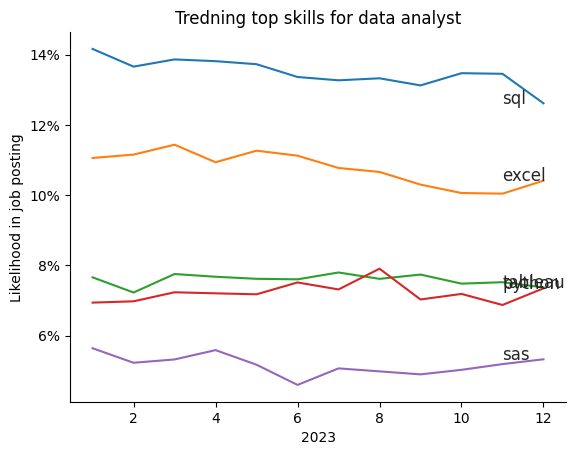

In [6]:
df_plot=da_us_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,palette='tab10',legend=False)
sns.despine()
sns.set_theme(style='ticks')
plt.title('Tredning top skills for data analyst')
plt.xlabel('2023')
plt.ylabel('Likelihood in job posting')
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
  plt.text(11,df_plot.iloc[-1,i],df_plot.columns[i])


In [7]:
df_plot.columns

Index(['sql', 'excel', 'tableau', 'python', 'sas'], dtype='object', name='job_skills')